Arnaud Strapart - 38321800 

Tâche 8

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from matplotlib import pyplot as plt
import numpy as np

In [2]:
USER_API_KEY = "Nodct0JRu4WQk1EPp"
with MPRester(USER_API_KEY) as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961673")
    bandstructure = m.get_bandstructure_by_material_id("mp-961673")
    print(structure)


Full Formula (Ti1 Fe1 Te1)
Reduced Formula: TiFeTe
abc   :   4.160199   4.160199   4.160199
angles:  60.000000  60.000000  60.000000
Sites (3)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Ti    0.5   0.5   0.5     -0.006
  1  Fe    0.25  0.25  0.25     0.008
  2  Te    0     0     0        0


### Déterminer la bande interdite de TiFeTe

In [3]:
gap = bandstructure.get_band_gap()
print("Energie de la bande interdite : " + str(gap.get('energy')) + " eV")
print("Bande interdite directe ? " + str(gap.get('direct')))
print("Transition dans la bande interdite : "+ str(gap.get('transition')))

Energie de la bande interdite : 0.9852000000000007 eV
Bande interdite directe ? False
Transition dans la bande interdite : L-X


Puisque la bande interdite est correspond à environs 1eV, on peut dire que le cristal a un comportement semi-conducteur au niveau énergique. 

La bande interdite est indirecte, cela veut dire que le minimum de la bande de conduction et le maximum de la bande de valence correspondent à des vecteurs d'onde différents. En effet le vecteur d'onde évolue selon une direction L-X dans la bande interdite.

### Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

In [4]:
max_BV = bandstructure.get_vbm()
min_BC = bandstructure.get_cbm()
 
# Déterminer le max de la dernière bande de valence
print("Indice des bandes contenant le max de BV : " + str(max_BV.get('band_index')))
print("Énergie du maximum de BV : ",str(max_BV.get('energy'))+" eV")

# Déterminer le min de la première bande de conduction
print("Indice des bandes contenant le min de BC : " + str(min_BC.get('band_index')))
print("Énergie du minimum de BC : ",str(min_BC.get('energy'))+" eV")


Indice des bandes contenant le max de BV : defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
Énergie du maximum de BV :  8.0344 eV
Indice des bandes contenant le min de BC : defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
Énergie du minimum de BC :  9.0196 eV


On peut donc dire que :

Dernière bande contenant le maximum de la bande de valence est la 14 (car 14 est la dernière bande)

Première bande contenant le minimum de la bande de conduction est la 15.




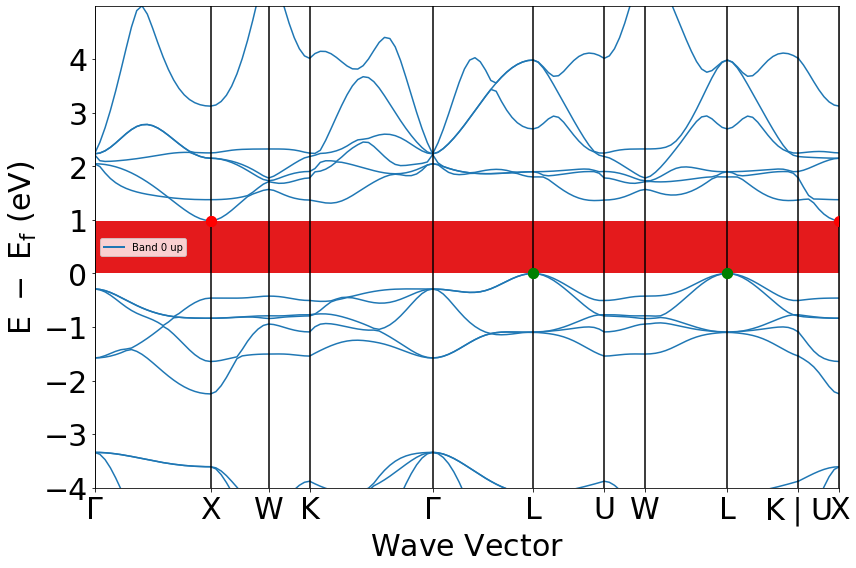

In [5]:
#affichage de la structure de bandes électroniques
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
distance = data.get('ticks').get('distance')
distances = data.get('distances')

plot.get_plot()
plt.fill_between(np.linspace(distance[0],distance[-1],500),0,gap.get('energy'))

cbms = data.get('cbm')
for i in range(len(cbms)):
    (a,b) = cbms[i]
    plt.plot(a,b,'or',markersize=10)
vbms = data.get('vbm')
for i in range(len(vbms)):
    (a,b) = vbms[i]
    plt.plot(a,b,'og',markersize=10)
    
plt.show()

Sur le graphe ci-dessus, on peut voir la structure de bande électronique du TiFeTe.

La bande interdite est en rouge. 

Le point rouge représente le minimum de la bande de conduction et les points verts représentent le maximum de la bande de valence.

### Déterminer le maximum et minimum de dispertion

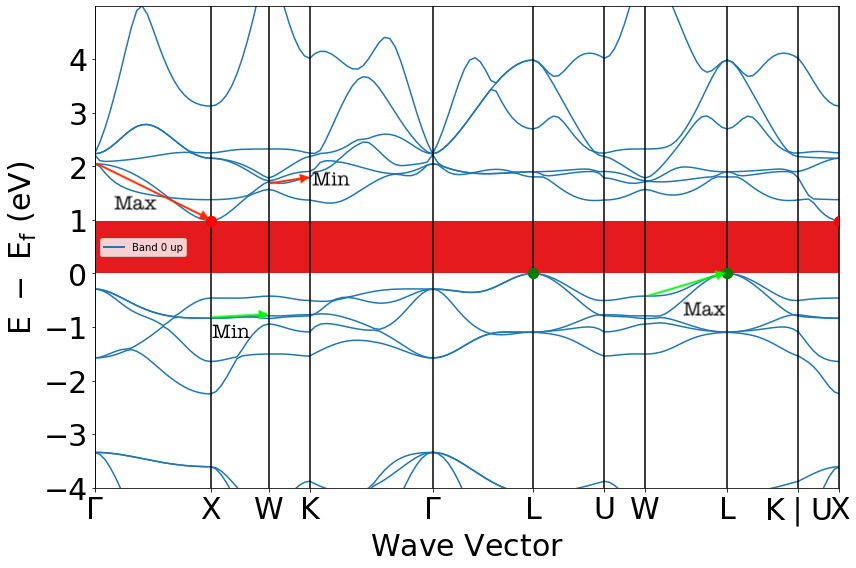

Pour calculer les maximums et minimums de dispertions, il faut trouver les pentes maximums et minimums sur le graphes. 

La dernière bande de valence présente donc le plus de dispersion dans la direction Γ - X et le moins de dispersion dans la direction W-K.

La première bande de conduction présente donc le plus de dispersion dans la direction W-L et le moins de dispersion dans la direction X-W.

### Calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

On suppose une dispertion parabolique, on doit donc trouver l'équation de la parabole pour ensuite calculer la massse effective à l'aide de la dérivée seconde.

In [6]:
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
energy = data['energy']["1"]

hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10) 


ks = np.zeros(3)
es = np.zeros(3)
(ks[1],es[1]) = vbms[1]
(ks[0],es[0]) = (distances[1][-2],energy[1][14][-2])
(ks[2],es[2]) = (distances[3][2],energy[1][14][2])
a = np.polyfit(ks,es,2)

#affichage des résultats Dernière bande de valence
print("Dernière bande de valence")
print("Parabole d'approximation : ","y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k + "+str(a[2]))
print("Dérivée seconde : ",str(2*a[0])+" eV\u212b\u00b2")
print("Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" kg")
print("\n")



ks = np.zeros(3)
es = np.zeros(3)
(ks[1],es[1]) = vbms[1]
(ks[0],es[0]) = (distances[1][-2],energy[1][15][-2])
(ks[2],es[2]) = (distances[3][2],energy[1][15][2])
a = np.polyfit(ks,es,2)

#affichage des résultats Première bande de conduction
print("Première bande de conduction")
print("Parabole d'approximation : ","y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k + "+str(a[2]))
print("Dérivée seconde : ",str(2*a[0])+" eV\u212b\u00b2")
print("Masse effective : ",str(hbar2/(2*a[0]*electronvolt*(angstrom)**2))+" kg")
print("\n")


Dernière bande de valence
Parabole d'approximation :  y(k) = 0.12082946733210902k² + -0.5037774403219399k + 0.06449773134863769
Dérivée seconde :  0.24165893466421803 eVÅ²
Masse effective :  2.872361238188637e-29 kg


Première bande de conduction
Parabole d'approximation :  y(k) = 0.17820040529083384k² + -1.6207730392794886k + 3.6388820430472735
Dérivée seconde :  0.35640081058166767 eVÅ²
Masse effective :  1.9476155389730883e-29 kg


